In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Data

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


lets explore

In [3]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Since we see only 492 cases of fraud detection and over 280,000 cases of legit transactions, this dataset is highly imbalanced.

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Let us plot distribtions of Time and Amount

Time

Text(0, 0.5, 'Frequency')

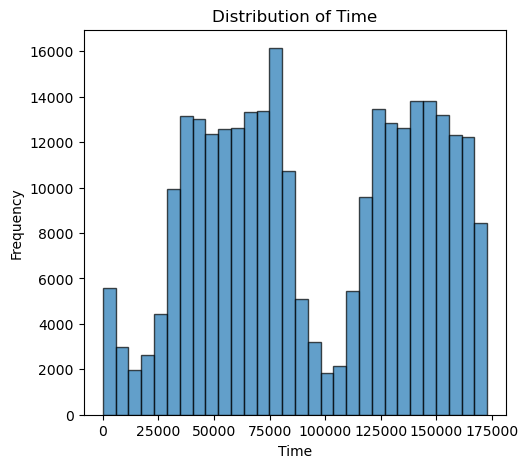

In [5]:
# Plotting histogram for Time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Time'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')

Amount

Text(0, 0.5, 'Frequency')

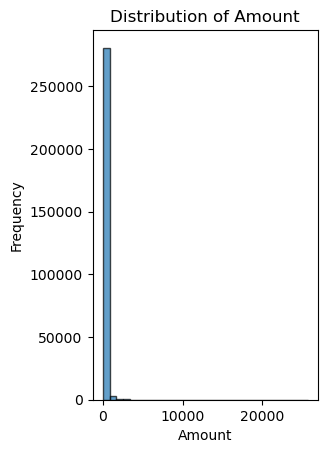

In [6]:
# Plotting histogram for Amount
plt.subplot(1, 2, 2)
plt.hist(df['Amount'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

Let us scale Amount and Time

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['Amount', 'Time']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


As we saw above, this dataset is higly imbalanced. To prevent this, we will do undersampling. Before that let us divide our Dataaset into Class=0 and Class=1

In [8]:
df_nfraud = df[df['Class'] == 0]
df_fraud = df[df['Class'] == 1]

df_nfraud['Class'].value_counts(), df_fraud['Class'].value_counts()

(Class
 0    284315
 Name: count, dtype: int64,
 Class
 1    492
 Name: count, dtype: int64)

In [9]:
df_nfraud.columns, df_fraud.columns

(Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'),
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'))

Let us compare the means and standard deviations of all the V columns from df_nfraud and df_fraud to see if it gives us some insight.

In [10]:
v_columns = df_nfraud.columns[df_nfraud.columns.str.startswith('V')]

# Calculate mean and standard deviation for both DataFrames
mean_nfraud = df_nfraud[v_columns].mean()
std_nfraud = df_nfraud[v_columns].std()

mean_fraud = df_fraud[v_columns].mean()
std_fraud = df_fraud[v_columns].std()

# Create a DataFrame to display the results
comparison_df = pd.DataFrame({
    'Mean (Non-Fraud)': mean_nfraud,
    'Mean (Fraud)': mean_fraud,
    'Std (Non-Fraud)': std_nfraud,
    'Std (Fraud)': std_fraud
})

print(comparison_df)

     Mean (Non-Fraud)  Mean (Fraud)  Std (Non-Fraud)  Std (Fraud)
V1           0.008258     -4.771948         1.929814     6.783687
V2          -0.006271      3.623778         1.636146     4.291216
V3           0.012171     -7.033281         1.459429     7.110937
V4          -0.007860      4.542029         1.399333     2.873318
V5           0.005453     -3.151225         1.356952     5.372468
V6           0.002419     -1.397737         1.329913     1.858124
V7           0.009637     -5.568731         1.178812     7.206773
V8          -0.000987      0.570636         1.161283     6.797831
V9           0.004467     -2.581123         1.089372     2.500896
V10          0.009824     -5.676883         1.044204     4.897341
V11         -0.006576      3.800173         1.003112     2.678605
V12          0.010832     -6.259393         0.945939     4.654458
V13          0.000189     -0.109334         0.995067     1.104518
V14          0.012064     -6.971723         0.897007     4.278940
V15       

 Features like V3, V10, V11, V12, V14, V16, and V17 show substantial differences in means, indicating potential importance in distinguishing between fraudulent and non-fraudulent transactions. We need to make sure that this holds true when we perform Undersampling of Non fraudulent cases.

In [11]:
# Sample 1000 elements from df_nfraud
sampled_nfraud = df_nfraud.sample(n=100000, random_state=42)

# Concatenate sampled_nfraud with df_fraud
df_usdata = pd.concat([sampled_nfraud, df_fraud], axis=0)

# Reset index of the new DataFrame
df_usdata.reset_index(drop=True, inplace=True)

df_usdata.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,100492.000000,100492.000000,100492.000000,100492.000000,100492.000000,100492.000000,100492.000000,100492.000000,100492.000000,100492.000000,...,100492.000000,100492.000000,100492.000000,100492.000000,100492.000000,100492.000000,100492.000000,100492.000000,100492.000000,100492.000000
mean,0.549002,-0.009821,0.010423,-0.024193,0.018922,-0.008205,-0.004867,-0.021193,0.000184,0.000309,...,-0.000844,-0.000153,0.002076,-0.000900,-0.002624,0.001040,0.002000,0.000465,0.003419,0.004896
std,0.274631,2.005609,1.666764,1.609263,1.442848,1.436584,1.344821,1.363136,1.266455,1.117368,...,0.779346,0.729243,0.620850,0.605029,0.521702,0.482264,0.415281,0.305847,0.009779,0.069800
min,0.000000,-46.855047,-60.464618,-48.325589,-5.560118,-113.743307,-21.929312,-43.557242,-73.216718,-13.434066,...,-34.830382,-9.499423,-30.269720,-2.836627,-7.081325,-2.604551,-9.543518,-15.430084,0.000000,0.000000
25%,0.313890,-0.920221,-0.598136,-0.906682,-0.836810,-0.695061,-0.770096,-0.559378,-0.207069,-0.642577,...,-0.228871,-0.545935,-0.161776,-0.356469,-0.317956,-0.326944,-0.070326,-0.052751,0.000224,0.000000
50%,0.491362,0.023039,0.065337,0.177122,-0.011879,-0.056358,-0.276506,0.037668,0.024000,-0.046645,...,-0.029895,0.005052,-0.010488,0.040792,0.015445,-0.050251,0.001583,0.011293,0.000859,0.000000
75%,0.806079,1.315323,0.808926,1.019963,0.755586,0.611844,0.390906,0.569639,0.328076,0.605030,...,0.185374,0.525052,0.148810,0.437999,0.347116,0.240843,0.092434,0.078361,0.003003,0.000000
max,1.000000,2.446505,22.057729,4.101716,16.875344,32.911462,73.301626,120.589494,20.007208,10.370658,...,27.202839,10.503090,22.083545,4.584549,6.070850,3.517346,31.612198,15.870474,1.000000,1.000000


Let's compare the means of V3, V10, V11, V12, V14, V16, and V17 before proceeding

In [12]:
# Select only the "V" columns for df_usdata
v_columns_usdata = df_usdata.columns[df_usdata.columns.str.startswith('V')]

# Calculate mean for both classes (0 and 1)
mean_class_0 = df_usdata[df_usdata['Class'] == 0][v_columns_usdata].mean()
mean_class_1 = df_usdata[df_usdata['Class'] == 1][v_columns_usdata].mean()

# Create a DataFrame to display the results
comparison_usdata_df = pd.DataFrame({
    'Mean (Class 0)': mean_class_0,
    'Mean (Class 1)': mean_class_1
})

print(comparison_usdata_df)

     Mean (Class 0)  Mean (Class 1)
V1         0.013609       -4.771948
V2        -0.007355        3.623778
V3         0.010292       -7.033281
V4        -0.003332        4.542029
V5         0.007258       -3.151225
V6         0.001986       -1.397737
V7         0.006100       -5.568731
V8        -0.002623        0.570636
V9         0.013010       -2.581123
V10        0.012526       -5.676883
V11       -0.009557        3.800173
V12        0.011740       -6.259393
V13       -0.002031       -0.109334
V14        0.011102       -6.971723
V15       -0.000991       -0.092929
V16        0.005787       -4.139946
V17        0.012492       -6.665836
V18        0.002587       -2.246308
V19       -0.002214        0.680659
V20       -0.002234        0.372319
V21       -0.004359        0.713588
V22       -0.000223        0.014049
V23        0.002284       -0.040308
V24       -0.000387       -0.105130
V25       -0.002841        0.041449
V26        0.000791        0.051648
V27        0.001170        0

The substantial difference in means of V3, V10, V11, V12, V14, V16, and V17 in this dataset too assures us that we dont need to resample as it captured the essence of the original df_nfraud dataframe. Now lets split our model.

In [13]:
# Shuffle the rows in df_usdata
df_usdata_shuffled = df_usdata.sample(frac=1, random_state=42)

X = df_usdata_shuffled.drop(columns=['Class'])
y = df_usdata_shuffled['Class']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (100492, 30)
Shape of y: (100492,)


Train test and Val set split

In [14]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (60294, 30)
Shape of X_val: (20099, 30)
Shape of X_test: (20099, 30)
Shape of y_train: (60294,)
Shape of y_val: (20099,)
Shape of y_test: (20099,)


Now lets build 3 models and compare
1. Logistic regression
2. Random Forest Classifier
3. Gradient Boosting Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, class_weight='balanced')

train em and make preds!

In [16]:
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_val)
gb_pred = gb_model.predict(X_val)
lr_pred = lr_model.predict(X_val)

Logistic Regression evaluation

In [17]:
print("Logistic Regression:")
print(classification_report(y_val, lr_pred))
print(confusion_matrix(y_val, lr_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     20000
           1       0.17      0.94      0.29        99

    accuracy                           0.98     20099
   macro avg       0.59      0.96      0.64     20099
weighted avg       1.00      0.98      0.98     20099

[[19547   453]
 [    6    93]]


Random Forest evaluation

In [18]:
print("Random Forest Classifier:")
print(classification_report(y_val, rf_pred))
print(confusion_matrix(y_val, rf_pred))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.97      0.79      0.87        99

    accuracy                           1.00     20099
   macro avg       0.99      0.89      0.94     20099
weighted avg       1.00      1.00      1.00     20099

[[19998     2]
 [   21    78]]


Gradient Boosting Classifier

In [19]:
print("Gradient Boosting Classifier:")
print(classification_report(y_val, gb_pred))
print(confusion_matrix(y_val, gb_pred))

Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.94      0.85      0.89        99

    accuracy                           1.00     20099
   macro avg       0.97      0.92      0.95     20099
weighted avg       1.00      1.00      1.00     20099

[[19995     5]
 [   15    84]]


You(even I) could change the sample size see which model performs overall the best!